<a href="https://colab.research.google.com/github/73Shivam/Projects/blob/master/neural_net_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers ,models

In [2]:
%load_ext tensorboard

In [3]:
%tensorflow_version 2.x

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/PROJECT1/dataset/train',
                                                 target_size =(32,32),
                                               batch_size = 32,
                                                 class_mode = 'binary')

Found 195 images belonging to 2 classes.


In [8]:
training_set

In [9]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/PROJECT1/dataset/test',
                                            target_size=(32,32),
                                            batch_size=32,
                                            class_mode ='binary')

Found 33 images belonging to 2 classes.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [11]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_logs = 'logs'
tensorflow_callback = tf.keras.callbacks.TensorBoard(train_logs,histogram_freq=1)

In [12]:
model.fit(training_set,
          epochs= 20,
          validation_data =(test_set),batch_size = 50
          )

Epoch 1/20
7/7 [==============================] - 126s 18s/step - loss: 0.5681 - accuracy: 0.7436 - val_loss: 0.7844 - val_accuracy: 0.5152
Epoch 2/20
7/7 [==============================] - 1s 85ms/step - loss: 0.5581 - accuracy: 0.7436 - val_loss: 0.7400 - val_accuracy: 0.5152
Epoch 3/20
7/7 [==============================] - 1s 85ms/step - loss: 0.5229 - accuracy: 0.7436 - val_loss: 0.5646 - val_accuracy: 0.6970
Epoch 4/20
7/7 [==============================] - 1s 86ms/step - loss: 0.4845 - accuracy: 0.8462 - val_loss: 0.4947 - val_accuracy: 0.8485
Epoch 5/20
7/7 [==============================] - 1s 85ms/step - loss: 0.4596 - accuracy: 0.8821 - val_loss: 0.5779 - val_accuracy: 0.7273
Epoch 6/20
7/7 [==============================] - 1s 85ms/step - loss: 0.4849 - accuracy: 0.8154 - val_loss: 0.4129 - val_accuracy: 0.9091
Epoch 7/20
7/7 [==============================] - 1s 83ms/step - loss: 0.4246 - accuracy: 0.8974 - val_loss: 0.3791 - val_accuracy: 0.9394
Epoch 8/20
7/7 [==========

In [ ]:
%tensorboard --logdir logs

In [14]:
test_loss, test_acc = model.evaluate(test_set)

2/2 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 1.0000


In [15]:
model.save('flower_prediction_Model_95_percent.h5')

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

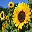

In [22]:
# load single image and resize it
w=h=32
img = image.load_img('/content/drive/My Drive/SUNFLOWER - Google Search/Z (4).jpg',target_size = (w,h))
img

In [23]:
# convert to numpy array
x = image.img_to_array(img)
x.shape

(32, 32, 3)

In [24]:
# prepare for passing into model
x= np.expand_dims(x,axis=0)
x.shape

(1, 32, 32, 3)

In [25]:

# just do it
result = model.predict(x)

In [26]:
# select the result where value is higher
if np.argmax(result, axis=-1)==0:
  print('lotus')
else:
  print('sunflower')

sunflower


In [27]:
def flower_predictor(image_path, model, w=32, h=32):
  img = image.load_img(image_path,target_size=(w,h))
  x= image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  return model.predict(x)

In [29]:
pred = flower_predictor('/content/drive/My Drive/lotus - Google Search/Z (13).jpg',model,)
if np.argmax(pred,axis=-1)==0:
  print('lotus')
else:
  print('sunflower')


lotus


In [30]:
pred = flower_predictor('/content/drive/My Drive/SUNFLOWER - Google Search/images (49).jpg',model,)
if np.argmax(pred,axis=-1)==0:
  print('lotus')
else:
  print('sunflower')


sunflower
